<a href="https://colab.research.google.com/github/DouglasC07/sigmoidal_data_science/blob/main/Analisando_os_Dados_do_Airbnb_(Cambridge_Massachusetts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Cambridge (Massachusetts)*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Cambridge, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
  # importar o arquivo listings.csv para um DataFrame
  df = pd.read_csv("http://data.insideairbnb.com/united-states/ma/cambridge/2022-09-22/visualisations/listings.csv") 

## Análise dos Dados


**Dicionário das variáveis**

* `id`- número de id gerado para identificar o imóvel
* `name`- nome da propriedade anunciada
* `host_id`- número de id do proprietário (anfitrião) da propriedade
* `host_name`- nome do anfitrião
* `neighbourhood_group`- esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude`- coordenada da latitude da propriedade
* `longitude`- coordenada da longitude da propriedade
* `room_type`- informa o tipo de quarto que é oferecido
* `price`- preço para alugar o imóvel
* `minimum_nights`- quantidade mínima de noites para reservar
* `number_of_reviews`- número de reviews que a propriedade possui
* `last_review`- data do último review
* `reviews_per_month`- quantidade de reviews por mês
* `calculated_host_listings_count`- quantidade de imóveis do mesmo anfitrião
* `availability_365`- número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número total de reviews que uma propriedade recebeu nos últimos 12 meses
* `licence`- Autorização/Permissão

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7903,"Colorful, modern 2 BR apt shared with host",14169,Stacy,NaN,Agassiz,42.39031,-71.09361,Private room,118,4,295,2022-09-06,1.83,1,10,16,NaN
1,8521,SunsplashedSerenity walk to Harvard & Fresh Pond,306681,Janet,NaN,West Cambridge,42.38258,-71.13646,Entire home/apt,300,2,50,2022-08-28,0.31,2,258,5,C0121120491
2,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,East Cambridge,42.35867,-71.06307,Entire home/apt,110,91,25,2020-04-15,0.25,5,279,0,NaN
3,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,NaN,Area 2/MIT,42.35061,-71.08787,Entire home/apt,135,29,5,2020-12-02,0.06,11,355,0,NaN
4,10986,North End (Waterfront area) CLOSE TO MGH & SU...,38997,Michelle,NaN,East Cambridge,42.36377,-71.05206,Entire home/apt,135,33,2,2016-05-23,0.03,11,356,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Antes de responder a primeira pergunta, vale contextualizar que o conjunto de dados está organizado em forma tabular, ou seja, linhas e colunas. Quando estamos querendo saber os atributos(Variáveis) e entradas, estamos nos referindo a quantidade de colunas e linhas respectivamente.

O *dataset* utilizado é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa `(listings.csv.gz)`. 



In [4]:
  # identificar o volume de dados do DataFrame
  print("Entradas:\t {}".format(df.shape[0]))
  print("Variáveis:\t {}\n".format(df.shape[1]))

  # verificar as 5 primeiras entradas do dataset
  display(df.dtypes)


Entradas:	 3089
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* é possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* A variável `Licence` possui mais da metade das linhas com valores nulos, cerca de 56,8%.
* As variáveis `reviews_per_month` e `last_review` possuem o mesmo valor de lihas com valores nulos, aproximadamente 24,3%.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.568145
reviews_per_month                 0.243121
last_review                       0.243121
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecce966760>,
      dtype=object)

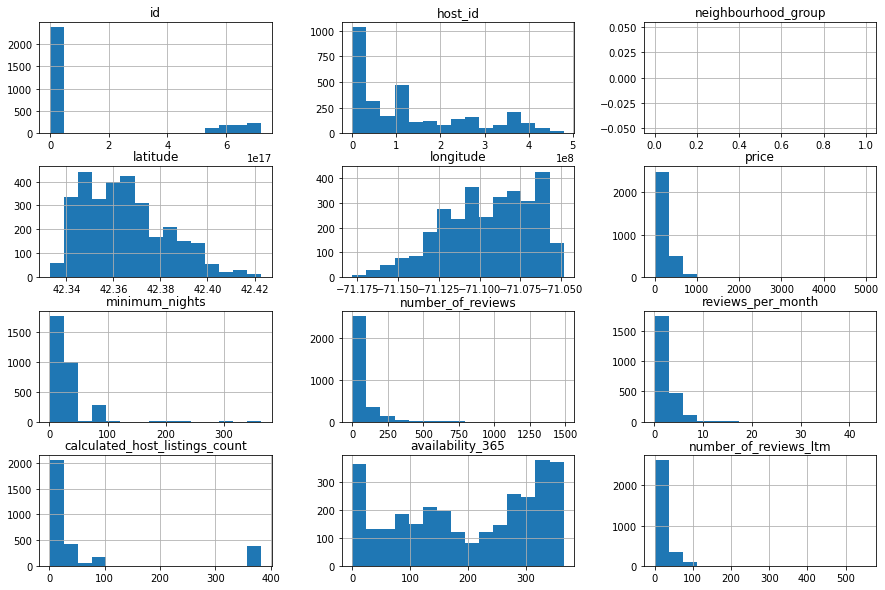

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### **Q4. Qual a média dos preços de aluguel?**

Como pode ser observado nos histogramas, existe indícios de *outliers*, provocando grande influência na média das variáveis numéricas, isto pode ser observado na variável `price`por exemplo.

In [7]:
# ver a média da coluna `price`
df.price.mean()

244.62220783425056

Existem duas maneiras que auxiliam a detecção de *outliers*, são elas:
* Resumo estatístico por meio do método `describe`.
* Plotar `boxplots`para a variável.

In [8]:
 # Ver resumo estatístico das variáveis númericas 
 df[['price','minimum_nights','number_of_reviews','reviews_per_month',
     'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3089.000000,3089.000000,3089.000000,2338.000000,3089.000000,3089.000000
mean,244.622208,21.636776,50.929427,1.952502,62.811590,198.554872
std,220.303675,31.701482,89.946567,2.192796,122.227894,121.063269
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,125.000000,1.000000,1.000000,0.390000,2.000000,91.000000
50%,207.000000,5.000000,11.000000,1.245000,11.000000,212.000000
75%,300.000000,31.000000,66.000000,2.947500,39.000000,314.000000
max,5000.000000,365.000000,1489.000000,43.370000,383.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price`possui 75% do valor abaixo de 300, porém seu valor máximo é 5000.

* A variável `number_of_reviews` (número de comentários) possui 75% do valor abaixo de 66, porém seu valor máximo é 1489.

#### Boxplot para minimum_nights


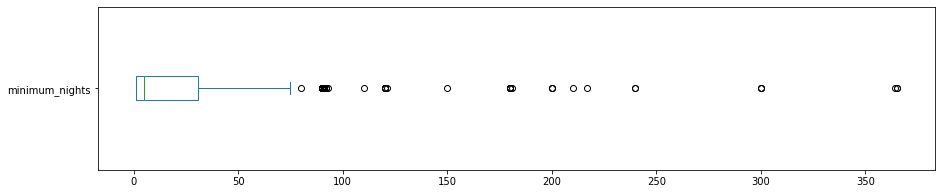

minimum_nights: valores acima de 100:
27 entradas
0.8741%


In [9]:
  # minimum_nights
  df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
  plt.show()

  # ver quantidade de valores acima de 100 dias para minimum_nights
  print("minimum_nights: valores acima de 100:")
  print("{} entradas".format(len(df[df.minimum_nights > 100])))
  print("{:.4f}%".format((len(df[df.minimum_nights > 100]) / df.shape[0])*100))

#### Boxplot para price

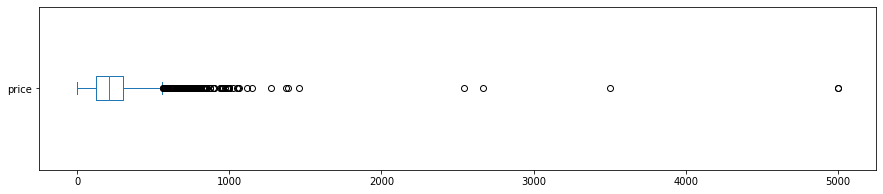


price: valores acima de 1500
5 entradas
0.1619%


In [10]:
  # price
  df.price.plot(kind='box', vert=False, figsize=(15,3))
  plt.show()

  # Ver quantidade de valores acima de 1500 para price
  print("\nprice: valores acima de 1500")
  print("{} entradas".format(len(df[df.price > 1500])))
  print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem outliers

Já que identificamos outliers nas variáveis `price`e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

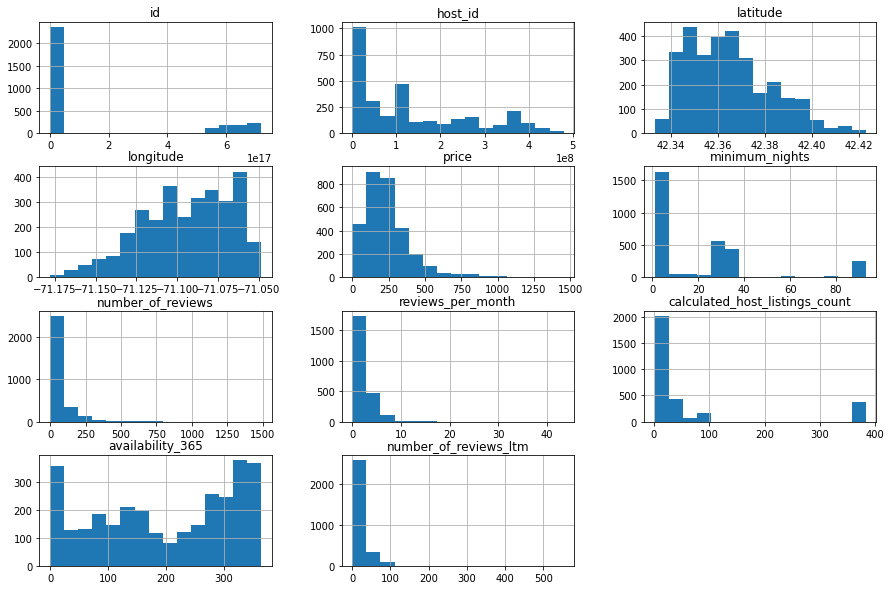

In [11]:
  # Remover os *outliers* em um novo DataFrame
  df_clean = df.copy()
  df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
  df_clean.drop(df_clean[df_clean.minimum_nights > 100].index, axis=0, inplace=True)

  # Remover `neighbourhood_group`, pois está vazio
  df_clean.drop('neighbourhood_group', axis=1, inplace=True)

  # Plotar o histograma para as variáveis numéricas
  df_clean.hist(bins=15, figsize=(15,10));

In [12]:
 # Nova média de preços após a remoção de *outliers*

 df_clean.price.mean()

239.8439646712463

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [13]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month',
                 'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.207064,-0.075096,0.068405,0.040211,0.118225
minimum_nights,-0.207064,1.000000,-0.253998,-0.353523,0.153067,0.105332
number_of_reviews,-0.075096,-0.253998,1.000000,0.583506,-0.227587,-0.094867
reviews_per_month,0.068405,-0.353523,0.583506,1.000000,-0.096539,-0.072487
calculated_host_listings_count,0.040211,0.153067,-0.227587,-0.096539,1.000000,0.188339
availability_365,0.118225,0.105332,-0.094867,-0.072487,0.188339,1.000000


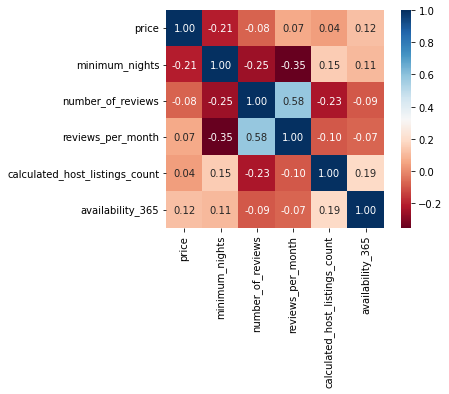

In [14]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    2142
Private room        882
Hotel room           18
Shared room          15
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.700687
Private room       0.288518
Hotel room         0.005888
Shared room        0.004907
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [17]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Area 2/MIT             302.819277
East Cambridge         270.300587
Cambridge Highlands    230.083333
Neighborhood Nine      211.682540
West Cambridge         206.433735
The Port               197.049020
Mid-Cambridge          196.322785
Riverside              195.328571
Agassiz                193.096774
Cambridgeport          186.125475
Name: price, dtype: float64

Como são fornecidas as latitudes e longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

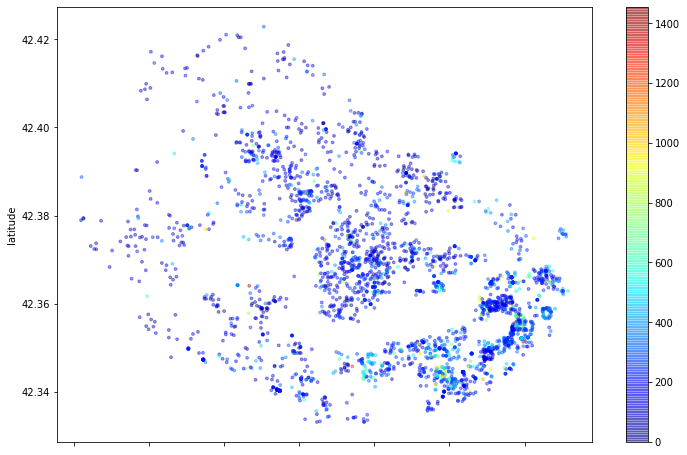

In [18]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [20]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

19.9816813869807

## Conclusões


* Apesar da presença de outliers na variável price, após ser realizada a remoção do mesmo e comparando o preço médio antes e depois, não houve tanta diferença no preço médio, podendo indicar um número muito baixo de outliers.

* Segundo a análise, a região mais cara na média é `Area 2/MIT`. Vale lembrar que trata-se de uma versão resumida do dataset, a quantidade de imóveis por Bairro poderá distorcer os valores, indicando um resultado fora da realidade. Por se tratar de uma região ocupada por muitos estudantes de graduação e pós-graduação, possívelmente existirá muitas propriedades alugadas se comparada a outras regiões, logo é necessário um estudo mais aprofundado para definir com maior precisão.